## Примеры латентной арифметики

In [ ]:
!pip install -q sentence-transformers umap-learn matplotlib

import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from umap import UMAP

model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


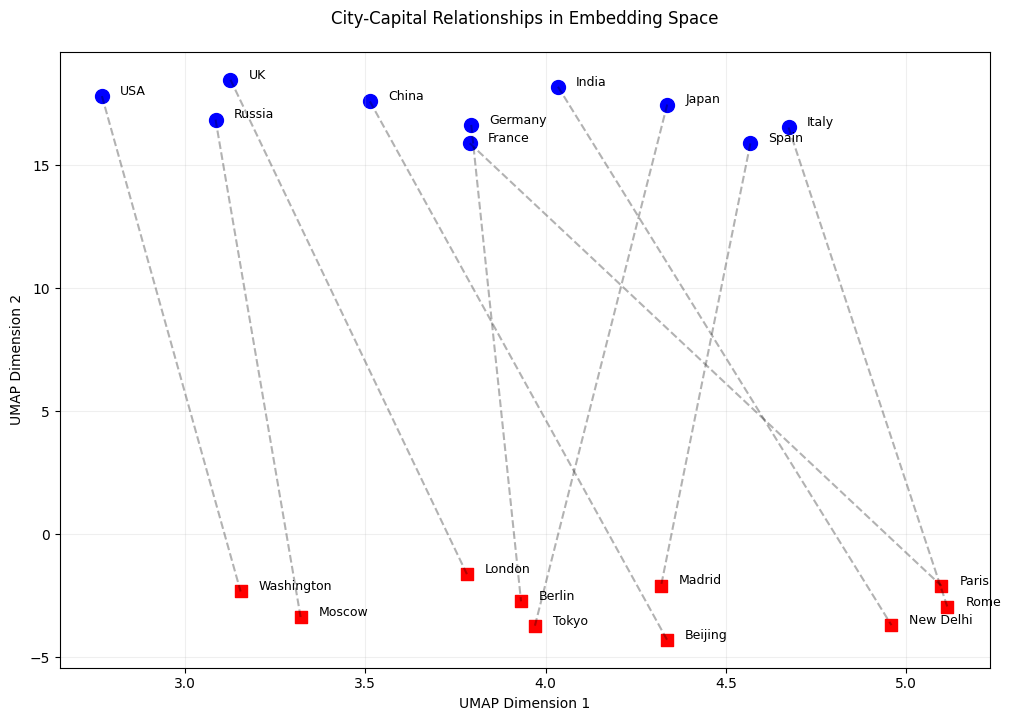

In [35]:
data = [
    ["France", "Paris"],
    ["Germany", "Berlin"],
    ["Italy", "Rome"],
    ["Japan", "Tokyo"],
    ["India", "New Delhi"],
    ["China", "Beijing"],
    ["Russia", "Moscow"],
    ["USA", "Washington"],
    ["UK", "London"],
    ["Spain", "Madrid"]
]

embeddings_country = [model.encode(item[0]) for item in data ]
embeddings_capital = [model.encode(item[1]) for item in data ]

reducer = UMAP(random_state=42)
embeddings_country_2d = reducer.fit_transform(embeddings_country)
embeddings_capital_2d = reducer.fit_transform(embeddings_capital)

plt.figure(figsize=(12, 8))

for i, (country, capital) in enumerate(data):
    x1, y1 = embeddings_country_2d[i]

    plt.scatter(x1, y1, c='blue', s=100)
    plt.text(x1+0.05, y1+0.05, country, fontsize=9, ha='left')

    x2, y2 = embeddings_capital_2d[i]
    plt.scatter(x2, y2, c='red', marker='s', s=80)
    plt.text(x2+0.05, y2+0.05, capital, fontsize=9, ha='left')

    plt.plot([x1, x2], [y1, y2], 'k--', alpha=0.3)

plt.title("City-Capital Relationships in Embedding Space", pad=20)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(alpha=0.2)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


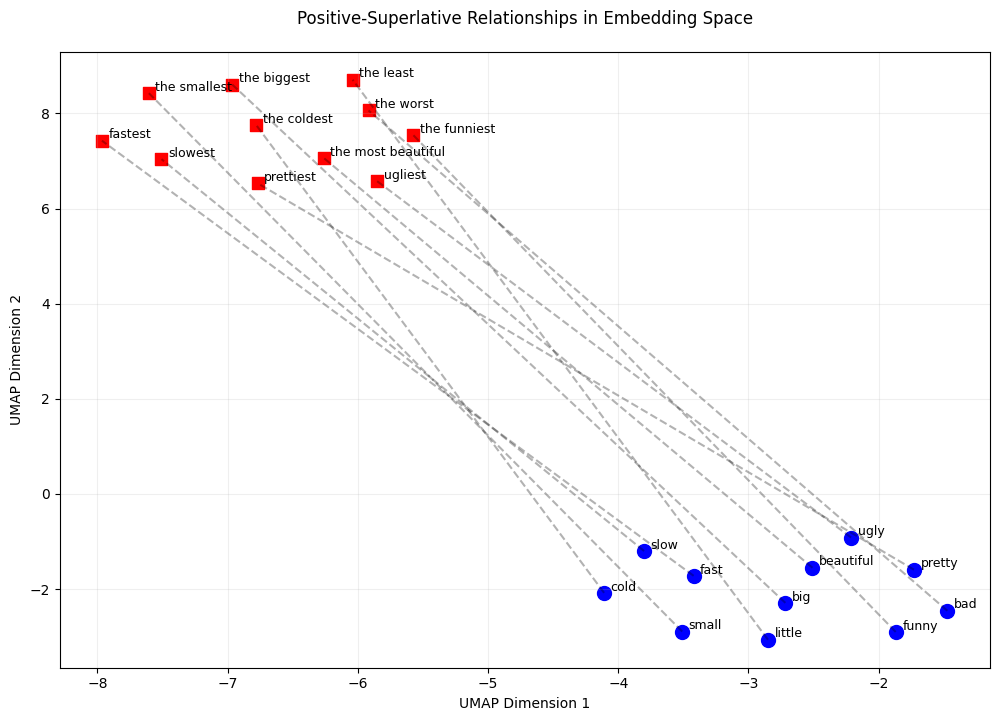

In [44]:
examples=[['big', 'the biggest'],
          ['small', 'the smallest'],
          ['cold', 'the coldest'],
          ['funny', 'the funniest'],
          ['beautiful', 'the most beautiful'],
          ['little', 'the least'],
          ['bad', 'the worst'],
          ['pretty', 'prettiest'],
          ['ugly', 'ugliest'],
          ['slow', 'slowest'],
          ['fast', 'fastest']]

embs_1=[model.encode(item[0]) for item in examples]
embs_2=[model.encode(item[1]) for item in examples]

reducer=UMAP(random_state=42)
embs_1_2d=reducer.fit_transform(embs_1)
embs_2_2d=reducer.fit_transform(embs_2)

plt.figure(figsize=(12, 8))

for i, (form_1, form_3) in enumerate(examples):
    x1, y1 = embs_1_2d[i]

    plt.scatter(x1, y1, c='blue', s=100)
    plt.text(x1+0.05, y1+0.05, form_1, fontsize=9, ha='left')

    x2, y2 = embs_2_2d[i]
    plt.scatter(x2, y2, c='red', marker='s', s=80)
    plt.text(x2+0.05, y2+0.05, form_3, fontsize=9, ha='left')

    plt.plot([x1, x2], [y1, y2], 'k--', alpha=0.3)

plt.title("Positive-Superlative Relationships in Embedding Space", pad=20)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(alpha=0.2)
plt.show()